In [126]:
import pandas as pd
from sklearn.linear_model import LinearRegression,ElasticNetCV,ElasticNet
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile,f_regression
from sklearn.model_selection import train_test_split, GridSearchCV,KFold, cross_val_score,cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
df_train = pd.read_csv(r'/Users/allen/Desktop/MSDS/QTW/qtw_smu/Case Study 1/superconduct/train.csv')
df_unique_m = pd.read_csv(r'/Users/allen/Desktop/MSDS/QTW/qtw_smu/Case Study 1/superconduct/unique_m.csv')


In [41]:
#merge two dataframes on indexes
df_merge = pd.merge(df_train, df_unique_m, left_index=True, right_index=True)

In [42]:
#delete duplicate and unused column
df_merge = df_merge.drop(['critical_temp_y','material'], axis=1)

#rename column from merge
df_merge.rename(columns = {'critical_temp_x':'critical_temp'}, inplace = True)

In [43]:
df_merge.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  wtd_std_atomic_mass  mean_fie  wtd_mean_fie   gmean_fie  \
0        51.968828            53.622535   775.425   1010.268571  718.152900   
1        47.094633            53.979870   766.440   1010.612857  720.605511   
2        51.968828            53.656268   775.425   1010.820000  718.152900   
3        51.968828            53.639405   775.425   1010.544286  718.152900   
4        51.968828            53.588771   775.425   1009.717143  718.152900   

   wtd_gmean_fie  entropy_fie  wtd_entropy_fie  range_fie  wtd_range_fie  \
0     938.016780     1.305967         0.791488      810.6     735.985714   
1     938.745413     1.544145         0.807078      810.6     743.164286   
2     939.009036     1.305967         0.773620      810.6     743.164286   
3     938.512777     1.305967         0.783207      810.6     739.575000   
4     937.025573     1.305967         0.805230      810.6     728.807143   

      std_fie  wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  \
0  323.811808   355.562967              160.25              105.514286   
1  290.183029   354.963511              161.20              104.971429   
2  323.811808   354.804183              160.25              104.685714   
3  323.811808   355.183884              160.25              105.100000   
4  323.811808   356.319281              160.25              106.342857   

   gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  \
0           136.126003                84.528423               1.259244   
1           141.465215                84.370167               1.508328   
2           136.126003                84.214573               1.259244   
3           136.126003                84.371352               1.259244   
4           136.126003                84.843442               1.259244   

   wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  \
0                   1.207040                  205                42.914286   
1                   1.204115                  205                50.571429   
2                   1.132547                  205                49.314286   
3                   1.173033                  205                46.114286   
4                   1.261194                  205                36.514286   

   std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  \
0          75.237540              69.235569    4654.35725       2961.502286   
1          67.321319              68.008817    5821.48580       3021.016571   
2          75.237540              67.797712    4654.35725       2999.159429   
3          75.237540              68.521665    4654.35725       2980.330857   
4          75.237540              70.634448    4654.35725       2923.845143   

   g

In [44]:
#show all columns..
pd.set_option('display.max_columns', None)

In [45]:
df_train.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  wtd_std_atomic_mass  mean_fie  wtd_mean_fie   gmean_fie  \
0        51.968828            53.622535   775.425   1010.268571  718.152900   
1        47.094633            53.979870   766.440   1010.612857  720.605511   
2        51.968828            53.656268   775.425   1010.820000  718.152900   
3        51.968828            53.639405   775.425   1010.544286  718.152900   
4        51.968828            53.588771   775.425   1009.717143  718.152900   

   wtd_gmean_fie  entropy_fie  wtd_entropy_fie  range_fie  wtd_range_fie  \
0     938.016780     1.305967         0.791488      810.6     735.985714   
1     938.745413     1.544145         0.807078      810.6     743.164286   
2     939.009036     1.305967         0.773620      810.6     743.164286   
3     938.512777     1.305967         0.783207      810.6     739.575000   
4     937.025573     1.305967         0.805230      810.6     728.807143   

      std_fie  wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  \
0  323.811808   355.562967              160.25              105.514286   
1  290.183029   354.963511              161.20              104.971429   
2  323.811808   354.804183              160.25              104.685714   
3  323.811808   355.183884              160.25              105.100000   
4  323.811808   356.319281              160.25              106.342857   

   gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  \
0           136.126003                84.528423               1.259244   
1           141.465215                84.370167               1.508328   
2           136.126003                84.214573               1.259244   
3           136.126003                84.371352               1.259244   
4           136.126003                84.843442               1.259244   

   wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  \
0                   1.207040                  205                42.914286   
1                   1.204115                  205                50.571429   
2                   1.132547                  205                49.314286   
3                   1.173033                  205                46.114286   
4                   1.261194                  205                36.514286   

   std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  \
0          75.237540              69.235569    4654.35725       2961.502286   
1          67.321319              68.008817    5821.48580       3021.016571   
2          75.237540              67.797712    4654.35725       2999.159429   
3          75.237540              68.521665    4654.35725       2980.330857   
4          75.237540              70.634448    4654.35725       2923.845143   

   g

In [46]:
df_unique_m.head()

H  He   Li   Be    B    C    N    O    F  Ne   Na   Mg   Al   Si    P  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   

     S   Cl  Ar    K   Ca   Sc   Ti    V   Cr   Mn   Fe   Co   Ni   Cu   Zn  \
0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.9  0.0   
2  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
3  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

    Ga   Ge   As   Se   Br  Kr   Rb   Sr    Y   Zr   Nb   Mo   Tc   Ru   Rh  \
0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    Pd   Ag   Cd   In   Sn   Sb   Te    I  Xe   Cs    Ba    La   Ce   Pr   Nd  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.20  1.80  0.0  0.0  0.0   
1  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.10  1.90  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.10  1.90  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.15  1.85  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.30  1.70  0.0  0.0  0.0   

   Pm   Sm   Eu   Gd   Tb   Dy   Ho   Er   Tm   Yb   Lu   Hf   Ta    W   Re  \
0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    Os   Ir   Pt   Au   Hg   Tl   Pb   Bi  Po  At  Rn  critical_temp  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           29.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           26.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           19.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           22.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           23.0   

                 material  
0         Ba0.2La1.8Cu1O4  
1  Ba0.1La1.9Ag0.1Cu0.9O4  
2         Ba0.1La1.9Cu1O4  
3       Ba0.15La1.85Cu1O4  
4         Ba0.3La1.7Cu1O4

In [47]:
df_train_shape = df_train.shape
df_unique_m_shape = df_unique_m.shape
df_merge_shape = df_merge.shape
print(f'Train DataFrame Shape: {df_train_shape}')
print(f'Unique_m DataFrame Shape:{df_unique_m_shape}')
print(f'Merged DataFrame Shape:{df_merge_shape}')

Train DataFrame Shape: (21263, 82)
Unique_m DataFrame Shape:(21263, 88)
Merged DataFrame Shape:(21263, 168)


In [48]:
df_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [49]:
df_unique_m.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              21263 non-null  float64
 1   He             21263 non-null  int64  
 2   Li             21263 non-null  float64
 3   Be             21263 non-null  float64
 4   B              21263 non-null  float64
 5   C              21263 non-null  float64
 6   N              21263 non-null  float64
 7   O              21263 non-null  float64
 8   F              21263 non-null  float64
 9   Ne             21263 non-null  int64  
 10  Na             21263 non-null  float64
 11  Mg             21263 non-null  float64
 12  Al             21263 non-null  float64
 13  Si             21263 non-null  float64
 14  P              21263 non-null  float64
 15  S              21263 non-null  float64
 16  Cl             21263 non-null  float64
 17  Ar             21263 non-null  int64  
 18  K     

In [50]:
df_merge.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 168 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    number_of_elements               int64  
 1    mean_atomic_mass                 float64
 2    wtd_mean_atomic_mass             float64
 3    gmean_atomic_mass                float64
 4    wtd_gmean_atomic_mass            float64
 5    entropy_atomic_mass              float64
 6    wtd_entropy_atomic_mass          float64
 7    range_atomic_mass                float64
 8    wtd_range_atomic_mass            float64
 9    std_atomic_mass                  float64
 10   wtd_std_atomic_mass              float64
 11   mean_fie                         float64
 12   wtd_mean_fie                     float64
 13   gmean_fie                        float64
 14   wtd_gmean_fie                    float64
 15   entropy_fie                      float64
 16   wtd_entropy_fie                  float

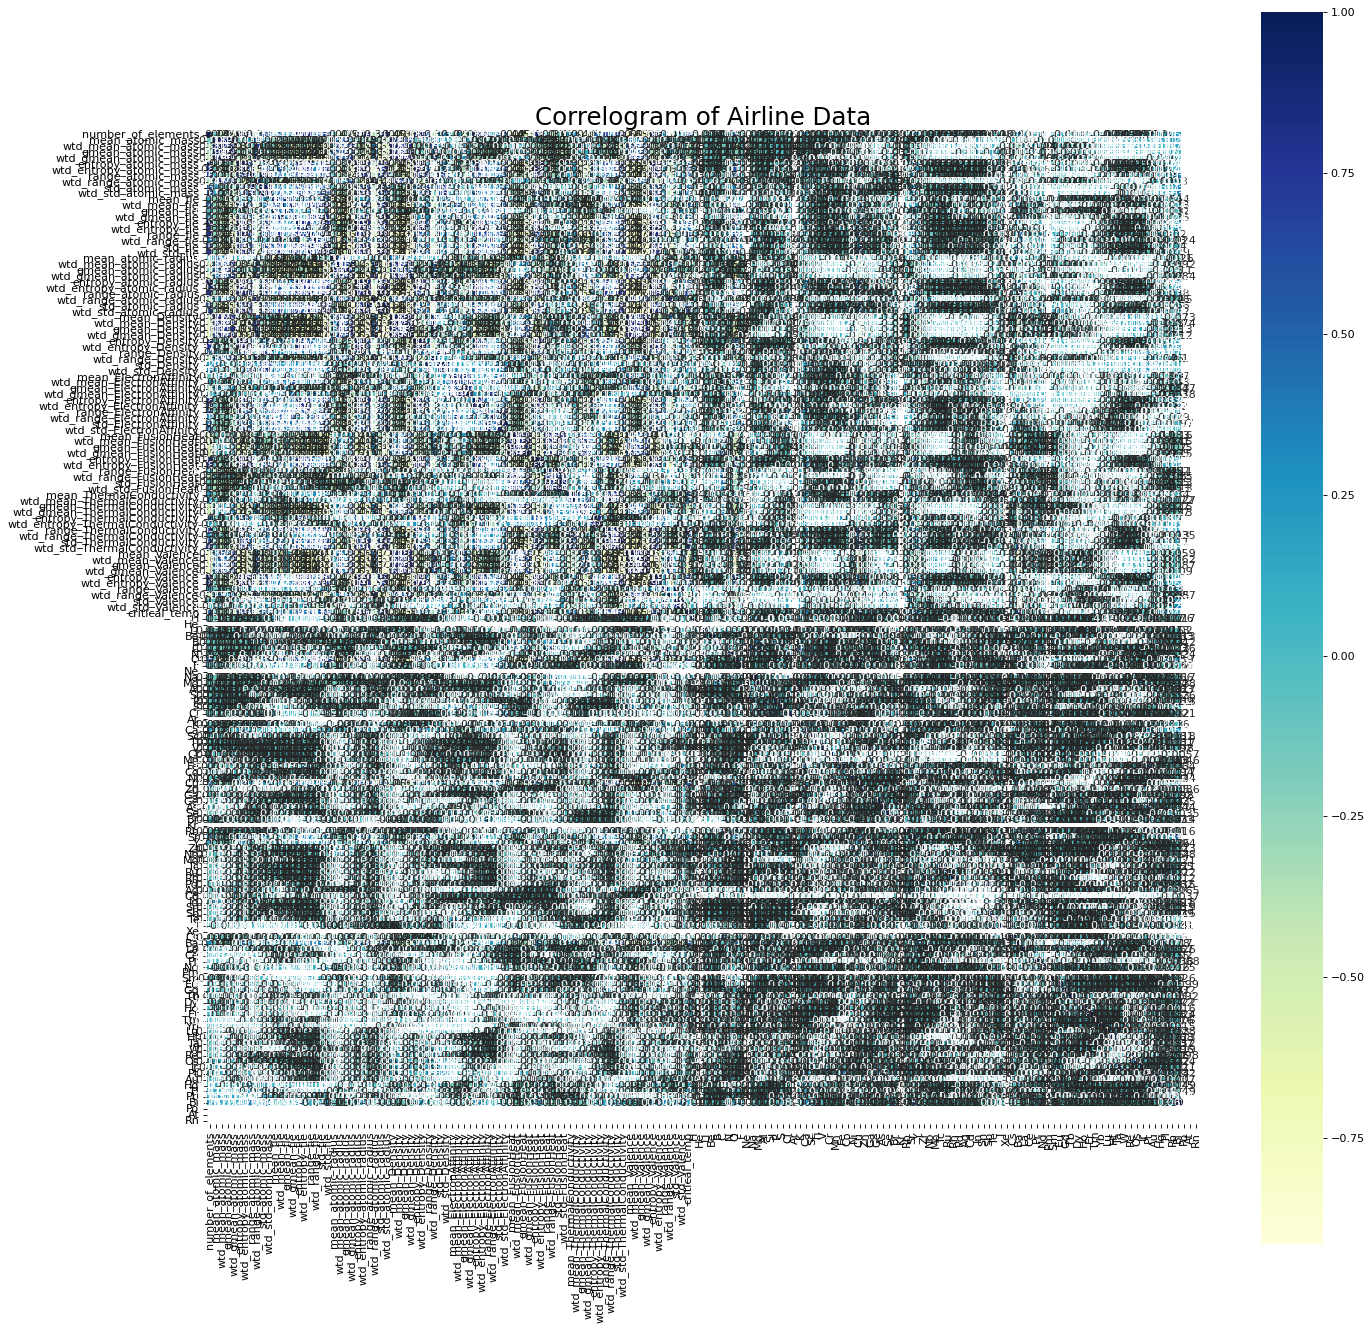

In [73]:
# plotting Correlogram of numerical columns
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(df_merge.corr(),
            xticklabels=df_merge.corr().columns,
            yticklabels=df_merge.corr().columns,
            cmap = "YlGnBu",
            square = True,
            annot=True,
            annot_kws={"size":10}
           )

# addting titles and font sizes
plt.title('Correlogram of Data', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Begin Modeling

In [91]:
#Specififying Stratified Kfold for cv.
kfcv = KFold(n_splits=10,random_state=0,shuffle=True)


In [85]:
lr = LinearRegression(n_jobs=-1)
target_col = ['critical_temp']
feature_cols = df_merge.loc[:, ~df_merge.columns.isin(target_col)].columns
y = df_merge.critical_temp
X = df_merge[feature_cols]

In [86]:
#create test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
#checking shape of data
print('X_train shape: ',X_train.shape,'\n')
print('X_test shape: ',X_test.shape,'\n')
print('y_train shape: ',y_train.shape,'\n')
print('y_test shape: ',y_test.shape)

X_train shape:  (17010, 167) 

X_test shape:  (4253, 167) 

y_train shape:  (17010,) 

y_test shape:  (4253,)


In [100]:
%%time
# Grid search for Logistic Regression task 1

lr_grid={"l1_ratio":np.arange(0.0,1.0,0.1), 
      "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
      }

model=ElasticNet(random_state = 0)

model_gs=GridSearchCV(model,
                       lr_grid,
                       cv = kfcv,
                       n_jobs=-1,
                       verbose = 0)

model_gs.fit(X_train,y_train)

print('GridSearchCV Metrics:\n__________________________\n')
print('Tuned hpyerparameters :(best parameters) ',model_gs.best_params_)
print('Accuracy :',model_gs.best_score_)
print('\nEnd GridSearchCV Metrics\n__________________________\n')

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.082e+06, tolerance: 1.797e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+06, tolerance: 1.810e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers 

GridSearchCV Metrics:
__________________________

Tuned hpyerparameters :(best parameters)  {'alpha': 0.1, 'l1_ratio': 0.9}
Accuracy : 0.7502341136509567

End GridSearchCV Metrics
__________________________

CPU times: user 15.6 s, sys: 8.87 s, total: 24.5 s
Wall time: 4min 57s


/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.910e+06, tolerance: 2.000e+03
  model = cd_fast.enet_coordinate_descent(


In [124]:
#imput GridSearch Output in Model
model = ElasticNet(l1_ratio=0.9,alpha = 0.1,random_state=0)
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.910e+06, tolerance: 2.000e+03
  model = cd_fast.enet_coordinate_descent(


In [130]:
model_mse = (mean_squared_error(y_true=y_test,y_pred=y_predict))
print(f'Elastic Net Mean Squared Error: {model_mse}')

r2 =r2_score(y_test,y_predict)
print(f'Elastic Net R2 Score: {r2}')


Elastic Net Mean Squared Error: 602.9450675404545
Elastic Net R2 Score: 0.4819638202090041


In [131]:
#print intercept and coefficients
lr_coef = model.coef_
lr_features_coef = pd.DataFrame(list(zip(X_train,lr_coef)))
lr_features_coef.columns = ['Feature','Coefficient']
lr_intercept = model.intercept_

print(f'Logistic Regression Intercept: {lr_intercept}')
print(lr_features_coef)


Logistic Regression Intercept: 4.148657532484165
                   Feature  Coefficient
0       number_of_elements     0.000000
1         mean_atomic_mass     0.459845
2     wtd_mean_atomic_mass    -0.493153
3        gmean_atomic_mass    -0.168837
4    wtd_gmean_atomic_mass     0.167585
..                     ...          ...
162                     Pb     0.000000
163                     Bi     4.321867
164                     Po     0.000000
165                     At     0.000000
166                     Rn     0.000000

[167 rows x 2 columns]


# NOTHING WORKS BELOW HERE

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, y_predict, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [63]:
print(pd.DataFrame(list(zip(lr.coef_, X_train))))

                0                      1
0   -3.168967e-11     number_of_elements
1    3.163463e-12       mean_atomic_mass
2   -2.942452e-12   wtd_mean_atomic_mass
3   -2.464726e-12      gmean_atomic_mass
4    2.101711e-12  wtd_gmean_atomic_mass
..            ...                    ...
163  4.264219e-13                     Pb
164  1.396387e-12                     Bi
165  0.000000e+00                     Po
166  0.000000e+00                     At
167  0.000000e+00                     Rn

[168 rows x 2 columns]


In [64]:
lr_coef = lr.coef_
lr_features_coef = pd.DataFrame(list(zip(X_train,lr_coef)))
lr_features_coef.columns = ['Feature','Coefficient']
lr_intercept = lr.intercept_

print(f'Logistic Regression Intercept: {lr_intercept}')
print(lr_features_coef)


Logistic Regression Intercept: -8.929390560297179e-11
                   Feature   Coefficient
0       number_of_elements -3.168967e-11
1         mean_atomic_mass  3.163463e-12
2     wtd_mean_atomic_mass -2.942452e-12
3        gmean_atomic_mass -2.464726e-12
4    wtd_gmean_atomic_mass  2.101711e-12
..                     ...           ...
163                     Pb  4.264219e-13
164                     Bi  1.396387e-12
165                     Po  0.000000e+00
166                     At  0.000000e+00
167                     Rn  0.000000e+00

[168 rows x 2 columns]


In [67]:
#Confusion Matrix
# 
lr_fit.score(X_test, y_pred)

1.0

In [70]:
y_pred


array([85.  , 85.5 , 11.6 , ...,  0.46, 34.  , 16.5 ])